Iron Man Project

By Eamon and Alex

In [1]:
%matplotlib inline

from modsim import *


In [2]:
m = UNITS.meter
s = UNITS.second
kg = UNITS.kilogram
N = UNITS.newton

In [3]:
condition = Condition(g=-9.8*m/s**2,
                      duration = 5, 
                      mass=186*kg,
                      tower_height = 260 * m,
                      c_d = 1.1,
                      rho = 1.204 * kg / m**3,
                      area = 2.74 * m**2,
                      x = 0 * m,
                      y = 1 * m,
                      v_initial = 255*m/s,
                      v_final=0*m/s)

In [4]:
def make_system(condition, x_distance):
    unpack(condition)
    
    vx = v_initial
    vy = 0
    
    init = State(x=x, y=y, vx=vx, vy=vy)
    ts = linrange(0,duration, 1)
    
    return System(init=init, g=g, mass=mass, 
                  area=area, rho=rho, c_d=c_d, ts=ts, x_distance = x_distance)

In [5]:
system = make_system(condition, 100 * m)
    

In [31]:
def find_thrusts(system):
    unpack(system)
    
    T_hands = (-(v_initial**2)/(2 * x_distance)) * mass
    time_to_building = (-v_initial)/(T_hands /mass)
    T_feet = mass * g + (mass*(-2 * tower_height/(time_to_building**2)))
    
    return(T_hands, T_feet)

In [32]:
system

,value
init,x 0 meter y ...
g,-9.8 meter / second ** 2
mass,186 kilogram
area,2.74 meter ** 2
rho,1.204 kilogram / meter ** 3
c_d,1.1
ts,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0]"
x_distance,100 meter


In [33]:
find_thrusts(system)

(<Quantity(-60473.25, 'kilogram * meter / second ** 2')>,
 <Quantity(-159053.25, 'kilogram * meter / second ** 2')>)

In [34]:
def slope_func(state, t, system):
    x, y, vx, vy = state
    unpack(system)
    
    dxdt = vx
    dydt = vy
    
    f_drag = c_d * rho * (vx**2 /2) * area
    
    if x < (x_distance/2):
        T_hands, T_feet = find_thrusts(system)
    else:
        T_hands, T_feet = find_thrusts(system)
        T_feet = 0
    
    a_drag = f_drag / mass
    a_T_hands = T_hands / mass
    a_T_feet = T_feet / mass
    
    ax = -a_drag - a_T_hands
    ay = g + a_T_feet
    
    return(dxdt,dydt,ax,ay)

In [35]:
slope_func(system.init, 0, system)

(<Quantity(255.0, 'meter / second')>,
 0,
 <Quantity(-309.1931758064517, 'meter / second ** 2')>,
 <Quantity(-864.925, 'meter / second ** 2')>)

In [36]:
run_odeint(system, slope_func)

In [37]:
system.results.head()

,x,y,vx,vy
0.0,0.000000,1.000000,255.000000,0.000000
1.0,200.632202,-169.271229,184.286614,-195.288814
2.0,383.664007,-369.460043,182.611306,-205.088814
3.0,566.239885,-579.448857,182.563971,-214.888814
4.0,748.802850,-799.237671,182.562628,-224.688814


In [38]:
xs = system.results.x
ys = system.results.y

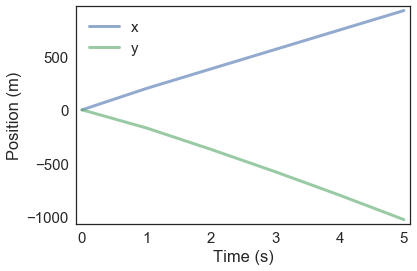

In [39]:
newfig()
plot(xs, label='x')
plot(ys, label='y')

decorate(xlabel='Time (s)',
         ylabel='Position (m)')

In [ ]:
newfig()

In [40]:
distance_array = linrange(100, 1000, 100)

C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
Before running scipy.integrate.odeint, I tried
                 running the slope function you provided with the
                 initial conditions in system and t=0, and I got
                 the following error:


ValueError: Cannot compare Quantity and <class 'numpy.float64'>

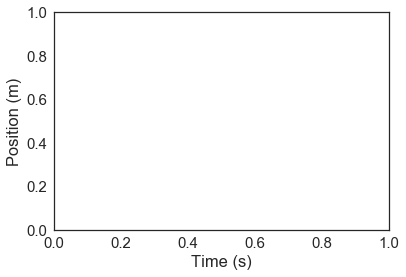

In [41]:
newfig()
decorate(xlabel='Time (s)',
         ylabel='Position (m)')

for distance in distance_array:
    system1 = make_system(condition, distance)
    run_odeint(system1, slope_func)
    xs = system1.results.x
    ys = system1.results.y
    plot(xs)
    plot(ys)